In [15]:
import numpy as np                   # import numpy package under shorthand "np"
import pandas as pd                  # import pandas package under shorthand "pd"
import matplotlib.pyplot as plt
from nose.tools import assert_equal
from numpy.testing import assert_array_equal
from matplotlib import style
%matplotlib inline
%config Completer.use_jedi = False  # enable code auto-completion
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler    # function to generate polynomial and interaction features
from sklearn.linear_model import LinearRegression    # classes providing Linear Regression with ordinary squared error loss and Huber loss, respectively
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error  # function to calculate mean squared error 

In [16]:
# read the data from the file "autos.csv" and store
# it in the dataframe "data"

data = pd.read_csv('car data.csv')

data.head(5)


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [18]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [19]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [20]:
data.columns


Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [21]:
fuel_type = data['Fuel_Type']
seller_type = data['Seller_Type']
transmission_type = data['Transmission']
selling_price = data['Selling_Price']

In [24]:
#manual encoding
data.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}}, inplace=True)
#one hot encoding
data = pd.get_dummies(data, columns=['Seller_Type', 'Transmission'], drop_first=True)


In [26]:
X = data.drop(['Car_Name','Selling_Price'], axis=1)
y = data['Selling_Price']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.5, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train, y_train)

pred_val_linear = linear_model.predict(X_val)
pred_val_tree = decision_tree_model.predict(X_val)

pred_test_linear = linear_model.predict(X_test)
pred_test_tree = decision_tree_model.predict(X_test)

linear_mae_val = mean_absolute_error(y_val, pred_val_linear)
linear_mse_val = mean_squared_error(y_val, pred_val_linear)
linear_r2_val = r2_score(y_val, pred_val_linear)

tree_mae_val = mean_absolute_error(y_val, pred_val_tree)
tree_mse_val = mean_squared_error(y_val, pred_val_tree)
tree_r2_val = r2_score(y_val, pred_val_tree)

linear_mae_test = mean_absolute_error(y_test, pred_test_linear)
linear_mse_test = mean_squared_error(y_test, pred_test_linear)
linear_r2_test = r2_score(y_test, pred_test_linear)

tree_mae_test = mean_absolute_error(y_test, pred_test_tree)
tree_mse_test = mean_squared_error(y_test, pred_test_tree)
tree_r2_test = r2_score(y_test, pred_test_tree)

print("Linear Regression Validation Set Metrics:")
print("MAE: ", linear_mae_val)
print("MSE: ", linear_mse_val)
print("R2 score: ", linear_r2_val)

print("Decision Tree Validation Set Metrics:")
print("MAE: ", tree_mae_val)
print("MSE: ", tree_mse_val)
print("R2 score: ", tree_r2_val)

print("Linear Regression Test Set Metrics:")
print("MAE: ", linear_mae_test)
print("MSE: ", linear_mse_test)
print("R2 score: ", linear_r2_test)

print("Decision Tree Test Set Metrics:")
print("MAE: ", tree_mae_test)
print("MSE: ", tree_mse_test)
print("R2 score: ", tree_r2_test)

Linear Regression Validation Set Metrics:
MAE:  1.742460869634859
MSE:  14.598076215476528
R2 score:  0.630525233132561
Decision Tree Validation Set Metrics:
MAE:  0.8764000000000003
MSE:  2.6469213333333332
R2 score:  0.9330068819949738
Linear Regression Test Set Metrics:
MAE:  1.2180690193977715
MSE:  3.6833127014913516
R2 score:  0.8116668616807556
Decision Tree Test Set Metrics:
MAE:  0.624078947368421
MSE:  1.3009960526315787
R2 score:  0.9334781786423274


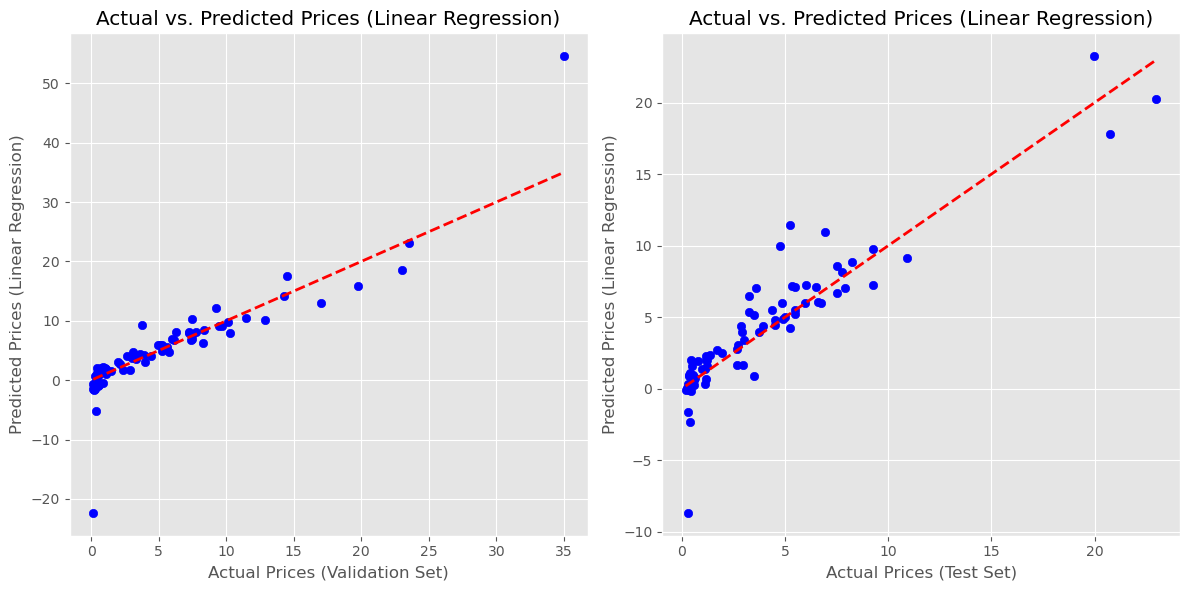

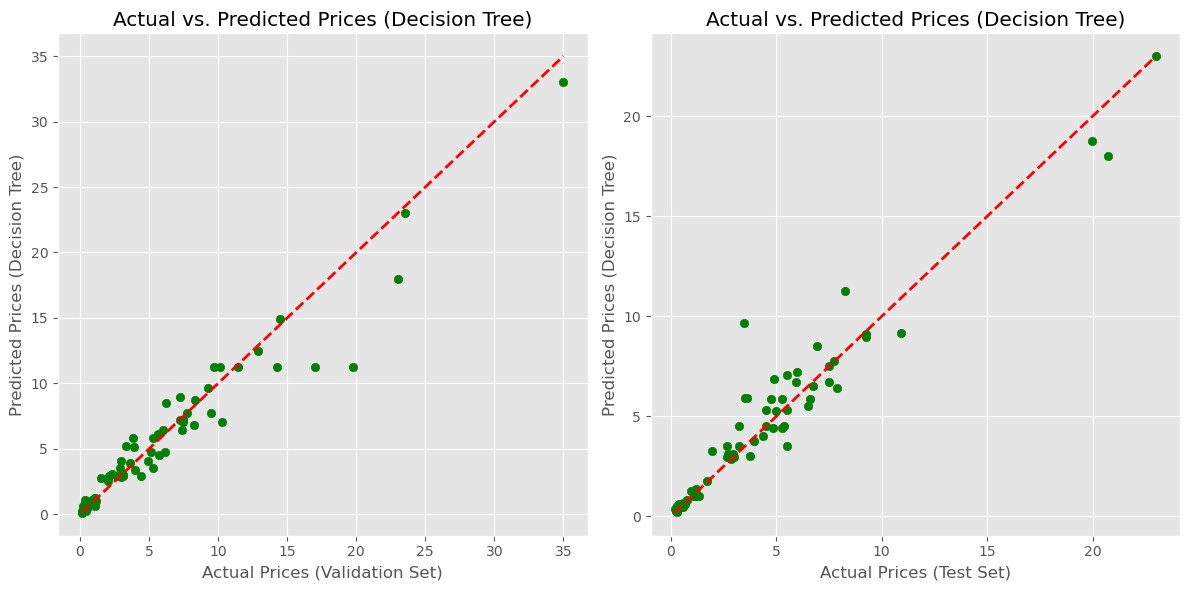

In [27]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_val, pred_val_linear, color='blue')
plt.xlabel("Actual Prices (Validation Set)")
plt.ylabel("Predicted Prices (Linear Regression)")
plt.title("Actual vs. Predicted Prices (Linear Regression)")
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], linestyle='--', color='red', linewidth=2)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(y_test, pred_test_linear, color='blue')
plt.xlabel("Actual Prices (Test Set)")
plt.ylabel("Predicted Prices (Linear Regression)")
plt.title("Actual vs. Predicted Prices (Linear Regression)")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.grid(True)

plt.tight_layout()
plt.show()

# Create scatter plots for Decision Tree
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_val, pred_val_tree, color='green')
plt.xlabel("Actual Prices (Validation Set)")
plt.ylabel("Predicted Prices (Decision Tree)")
plt.title("Actual vs. Predicted Prices (Decision Tree)")
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], linestyle='--', color='red', linewidth=2)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(y_test, pred_test_tree, color='green')
plt.xlabel("Actual Prices (Test Set)")
plt.ylabel("Predicted Prices (Decision Tree)")
plt.title("Actual vs. Predicted Prices (Decision Tree)")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.grid(True)

plt.tight_layout()
plt.show()